### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 8

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Еременко Артем Геннадьевич
##### Группа:   НПИбд-01-18

## Москва 2021
***

### ЛР 8, вариант 4  

Automobile Data Set 

Название файла: imports-85.data 

Ссылка: https://archive.ics.uci.edu/ml/datasets/Automobile 

Предиктор: horsepower (столбец No 22) 

Зависимая переменная: price (столбец No 26) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

def PolynomialLinearSVC(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('svc', LinearSVC())
    ])


#### 1. Считайте заданный набор данных из репозитария UCI (независимую и зависимую переменные).

In [2]:
url = \
"https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

main_df = pd.read_csv( url,\
                      header=None)

df = main_df[[21,25]]
df.columns = ['horsepower','price']
df

,horsepower,price
0,111,13495
1,111,16500
2,154,16500
3,102,13950
4,115,17450
...,...,...
200,114,16845
201,160,19045
202,134,21485
203,106,22470


#### 2.         Если в столбцах для независимой или зависимой переменных имеются пропущенные значения, то удалите данные.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   horsepower  205 non-null    object
 1   price       205 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB


In [4]:
indexNames = df[ (df['horsepower'] == '?') | (df['price'] == '?')].index
df.drop(indexNames , inplace=True)
df = df.reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   horsepower  199 non-null    object
 1   price       199 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


D:\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### 3.           Масштабируйте независимую и зависимую переменную на диапазон от 0 до 1 и визуализируйте набор данных на плоскости (ось абсцисс - независимая переменная, ось ординат - зависимая переменная).

 



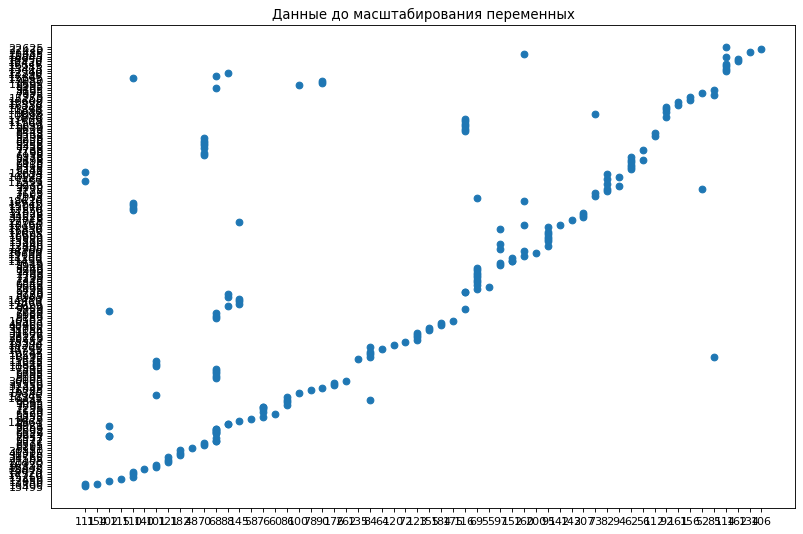

In [5]:
x = df['horsepower']
y = df['price']

plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(x, y)
plt.title('Данные до масштабирования переменных')
plt.show()

In [6]:
x = pd.DataFrame.to_numpy(df['horsepower'])
y = pd.DataFrame.to_numpy(df['price'])

x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

scaler = MinMaxScaler(feature_range=(0, 1)) # значения признаков от 0 до 1

x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [7]:
x_mean = np.mean(x)
y_mean = np.mean(y)

num = 0.0
d = 0.0
for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2
    
a = num/d
b = y_mean - a * x_mean
y_hat = a * x + b


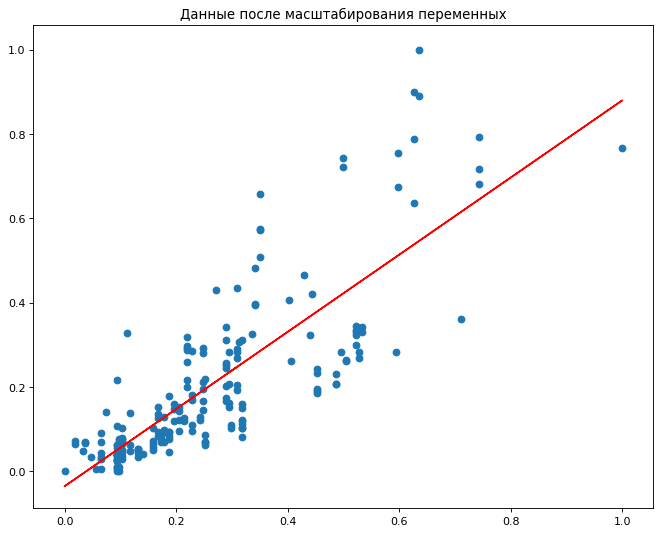

In [8]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(x, y_hat, color='r')
plt.scatter(x, y)
plt.title('Данные после масштабирования переменных')
plt.show()

#### 4.         Разбейте набор данных на обучающую и тестовую выборки.

 



In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### 5.          Постройте регресcоры на базе следующих моделей регрессии:

* линейной регрессии (LinearRegression)
* полиномиальной регрессии (PolynomialFeatures+LinearRegression)
* стохастического градиентного спуска (SGDRegressor)
* гребневой регрессии (Ridge)
* лассо регрессии (Lasso)
* регрессии эластичная сеть (ElasticNet)
* регрессии на основе метода ближайших соседей (KNeighborsRegressor)
* регрессии на основе деревьев решений (DecisionTreeRegressor)
* регрессии на основе метода опорных векторов (SVR)



In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.5956748023545766

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit(X_train)

X2_train = poly.transform(X_train)
X2_test = poly.transform(X_test)

lin_reg2 = LinearRegression()
lin_reg2.fit(X2_train, y_train)
#y_predict2 = lin_reg2.predict(X2)
lin_reg2.score(X2_test, y_test)

0.5989446894647545

In [12]:
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)
sgd_reg.score(X_test, y_test)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.04071539300413751

In [13]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

'''
def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])
'''

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.5196417573406429

In [14]:
from sklearn.linear_model import Lasso

'''
def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])
'''
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

-0.1608255076041496

In [15]:
from sklearn.linear_model import ElasticNet

'''
def ElNetRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("elnet_reg", ElasticNet(alpha=alpha))
    ])
'''

elnet_reg = ElasticNet()
elnet_reg.fit(X_train, y_train)
elnet_reg.score(X_test, y_test)

-0.1608255076041496

In [16]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
knn_reg.score(X_test, y_test)

0.7371925068819887

In [17]:
from sklearn.tree import DecisionTreeRegressor

'''

def TreeRegression(max_leaf_nodes=None):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("tree_reg", DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes))
    ])
'''


tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_reg.score(X_test, y_test)

0.769963530619809

In [18]:
from sklearn.svm import SVR

'''
def SVMRegression(degree):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svm_reg", SVR(kernel='poly',degree=degree))
    ])
'''    

svm_reg = SVR()
svm_reg.fit(X_train, y_train)
svm_reg.score(X_test, y_test)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6609619315473056

#### 6.         При помощи GridSearch определите оптимальные параметры регрессоров (кроме LinearRegression).

In [19]:
from sklearn.model_selection import GridSearchCV



In [20]:
param_grid_sgd = [
    {
        "penalty": [i for i in ['l1', 'l2', 'elasticnet']],
        "alpha": [i for i in np.linspace(1e-25,1.0)],
        "epsilon": [i for i in np.linspace(0.1,0.2)]
    }
]

grid_search = GridSearchCV(sgd_reg, param_grid_sgd, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 7500 candidates, totalling 37500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 4624 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 20624 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 37480 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 37500 out of 37500 | elapsed:   18.1s finished
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'alpha': 1e-25, 'epsilon': 0.17551020408163265, 'penalty': 'elasticnet'}

In [21]:
param_grid_ridge = [
    {
        'alpha': [i for i in np.linspace(1e-25,1.0)],
        "solver": [i for i in ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']]
    }
]

grid_search = GridSearchCV(ridge_reg, param_grid_ridge, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    0.7s finished


{'alpha': 0.1020408163265306, 'solver': 'saga'}

In [29]:
param_grid_lasso = [
    {
        'alpha': [i for i in np.linspace(1e-25,1.0)],
        "selection": [i for i in ["cyclic", "random"]],
        "warm_start": [i for i in [True, False]]
    }
]

grid_search = GridSearchCV(lasso_reg, param_grid_lasso, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.5s finished


{'alpha': 1e-25, 'selection': 'cyclic', 'warm_start': True}

In [30]:
param_grid_elnet = [
    {
        'alpha': [i for i in np.linspace(1e-25,1.0)],
        "l1_ratio": [i for i in np.linspace(0,1.0)],
        "warm_start": [i for i in [True, False]]
    }
]

grid_search = GridSearchCV(elnet_reg, param_grid_elnet, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 11248 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 24985 out of 25000 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 25000 out of 25000 | elapsed:    8.6s finished
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8000257434348088, tolerance: 0.0004622715171764404
  positive)


{'alpha': 1e-25, 'l1_ratio': 0.0, 'warm_start': True}

In [24]:
param_grid_knn = [
    {
        "weights": ["uniform"],
        "n_neighbors": [i for i in range(1, 11)]
    },
    {
        "weights": ["distance"],
        "n_neighbors": [i for i in range(1, 11)],
        "p": [i for i in range(1,6)]
    }
]

grid_search = GridSearchCV(knn_reg, param_grid_knn, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished


{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

In [25]:
param_grid_tree = [
    {
        "criterion": [i for i in ["squared_error", "friedman_mse", "absolute_error", "poisson"]],
        "max_depth": [i for i in range(0,10)],
        "min_samples_leaf": [i for i in range(1,10)],
        "min_samples_split": [i for i in range(2,10)]
    }
]

grid_search = GridSearchCV(tree_reg, param_grid_tree, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Done 11248 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 14400 out of 14400 | elapsed:    4.3s finished


{'criterion': 'friedman_mse',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [28]:
param_grid_svm = [
    { 
        "kernel": ["poly"],
        "degree": [i for i in range(2,4)],
        "C": [i for i in np.linspace(0.0,3.0)]
    }
    
]

grid_search = GridSearchCV(svm_reg, param_grid_svm, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.9s finished
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1.346938775510204, 'degree': 2, 'kernel': 'poly'}

#### 7.          Визуализируйте на плоскости точки тестовой выборки и графики различных моделей регрессий разными цветами. Подпишите оси и создайте легенду для графика.

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8000257434348088, tolerance: 0.0004622715171764404
  positive)
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


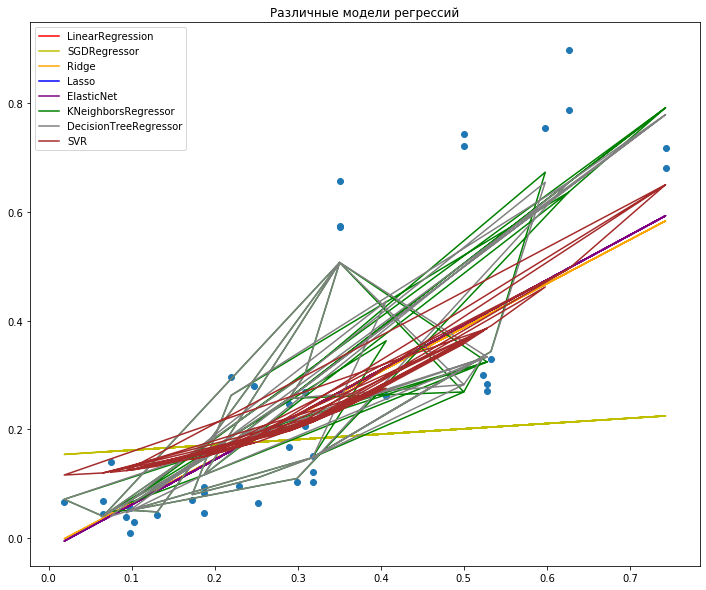

In [36]:
plt.figure(figsize=(12,10))
plt.scatter(X_test, y_test)

y_predict_lin = lin_reg.predict(X_test)
plt.plot(X_test, y_predict_lin, color='r', label='LinearRegression')

sgd_reg = SGDRegressor(alpha=1e-25, epsilon=0.17551020408163265, penalty='elasticnet')
sgd_reg.fit(X_train, y_train)
y_predict_sgd = sgd_reg.predict(X_test)
plt.plot(X_test, y_predict_sgd, color='y', label='SGDRegressor')

ridge_reg = Ridge(alpha=0.1020408163265306, solver='saga')
ridge_reg.fit(X_train, y_train)
y_predict_ridge = ridge_reg.predict(X_test)
plt.plot(X_test, y_predict_ridge, color='orange', label='Ridge')

lasso_reg = Lasso(alpha=1e-25, selection='cyclic', warm_start=True)
lasso_reg.fit(X_train, y_train)
y_predict_lasso = lasso_reg.predict(X_test)
plt.plot(X_test, y_predict_lasso, color='b', label='Lasso')

elnet_reg = ElasticNet(alpha=1e-25, l1_ratio=0.0, warm_start=True)
elnet_reg.fit(X_train, y_train)
y_predict_elnet = elnet_reg.predict(X_test)
plt.plot(X_test, y_predict_elnet, color='purple', label='ElasticNet')

knn_reg = KNeighborsRegressor(n_neighbors=10, p=1, weights='distance')
knn_reg.fit(X_train, y_train)
y_predict_knn = knn_reg.predict(X_test)
plt.plot(X_test, y_predict_knn, color='g', label='KNeighborsRegressor')

tree_reg = DecisionTreeRegressor(criterion='friedman_mse', max_depth=9, min_samples_leaf=1, min_samples_split=3)
tree_reg.fit(X_train, y_train)
y_predict_tree = tree_reg.predict(X_test)
plt.plot(X_test, y_predict_tree, color='gray', label='DecisionTreeRegressor')

svr_reg = SVR(C=1.346938775510204, degree=2, kernel='poly')
svr_reg.fit(X_train, y_train)
y_predict_svr = svr_reg.predict(X_test)
plt.plot(X_test, y_predict_svr, color='brown', label='SVR')




plt.title('Различные модели регрессий')

plt.legend()
plt.show()